In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


Original "x_train" shape: (60000, 28, 28), Original "y_train" shape: (60000,)
Original "x_test"  shape: (10000, 28, 28), Original "y_test"  shape: (10000,)


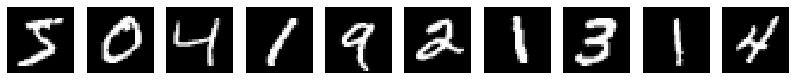

In [70]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'Original "x_train" shape: {x_train.shape}, Original "y_train" shape: {y_train.shape}')
print(f'Original "x_test"  shape: {x_test.shape}, Original "y_test"  shape: {y_test.shape}')

plt.figure(1, figsize=(14, 14))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')


In [71]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_train /= 255 

x_test = x_test.astype('float32')
x_test /= 255

print(f'New "x_train" shape: {x_train.shape}, New "y_train" shape: {y_train.shape}')
print(f'New "x_test"  shape: {x_test.shape}, New "y_test"  shape: {y_test.shape}')

In [73]:
print(f'Sample pre-encoded: {y_test[0]}')
y_train = np_utils.to_categorical(y_train, 10)
y_test  = np_utils.to_categorical(y_test, 10)
print(f'Sample post-encoded: {y_test[0]}')


Sample pre-encoded: 7
Sample post-encoded: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [74]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(x_test, y_test))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_29 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.2580 - accuracy: 0.9249 - val_loss: 0.1200 - val_accuracy: 0.9632

/home/daithi/Downloads/MNIST-Number-Recognition/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


In [75]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test cross-entropy loss: {score[0]}')
print(f'Test accuracy: {score[1]}')
model.save('mnist.model')

Test cross-entropy loss: 0.08084949907479314
Test accuracy: 0.9799000024795532
